In [1]:
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = DataFrame({
    'year': np.arange(2004, 2012),
    'salary': [639000, 650000, 649900, 656800, 690000, 700000, 705670, 715000]
})
df

,salary,year
0,639000,2004
1,650000,2005
2,649900,2006
3,656800,2007
4,690000,2008
5,700000,2009
6,705670,2010
7,715000,2011


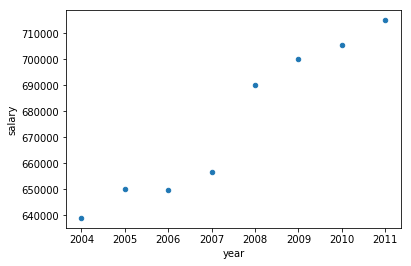

In [3]:
# exploratory work on the data to ascertain if we can model it using Linear Regression
df.plot.scatter(x='year', y='salary')
plt.show()

In [4]:
df.corr()

,salary,year
salary,1.000000,0.968518
year,0.968518,1.000000


In [6]:
lr = LinearRegression()
# LinearRegtession model needs data separated out ie. X - Independent variable y - Dependent variable
X = df[['year']].values
y = df['salary'].values
# X and y are called as training data
print(X)
print(y)

[[2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]]
[639000 650000 649900 656800 690000 700000 705670 715000]


In [7]:
# training the linear regression model with the existing data
lr.fit(X, y)
# uses Ordinary Least Squares (OLS) regression model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
slope = lr.coef_[0]
y_intercept = lr.intercept_
print('Best fit line is: y = {0}x + {1}'.format(slope, y_intercept))

Best fit line is: y = 11831.547619047618x + -23076035.595238093


In [11]:
y_pred = lr.predict(X)
y_pred

array([ 634385.83333333,  646217.38095238,  658048.92857143,
        669880.47619048,  681712.02380953,  693543.57142857,
        705375.11904762,  717206.66666667])

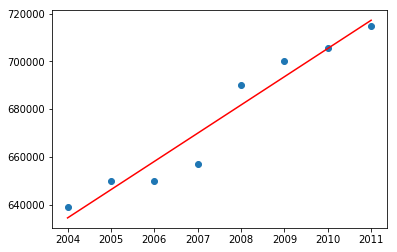

In [12]:
plt.scatter(x=X, y=y)
plt.plot(X, y_pred, color='red') # draw the best fit regression line
plt.show()

In [13]:
# Predict the salary in the year 2018
lr.predict([[2018], [2021]])

array([ 800027.5       ,  835522.14285714])

In [14]:
# coefficient of detemination
lr.score(X, y)

0.93802716634105843

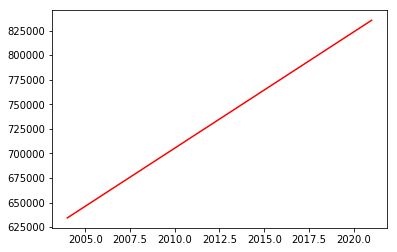

In [15]:
# testing data
x_test = np.arange(2004, 2022).reshape(-1, 1)
y_pred_2 = lr.predict(x_test)
plt.plot(x_test, y_pred_2, color='red')
plt.show()

In [48]:
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print('Mean absolute error : {0}'.format(mae))
print('Root mean squared error : {0}'.format(rmse))

Mean absolute error : 5859.01785714319
Root mean squared error : 6968.096825037628
